SVM and Kernels 3D rotating plot

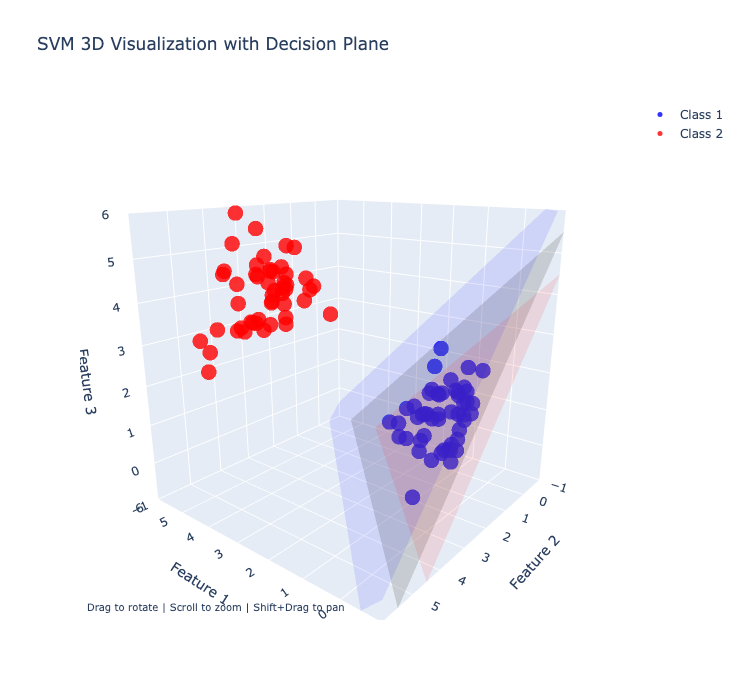

In [30]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 生成样本数据
np.random.seed(42)
data_blue = np.random.multivariate_normal(
    [1, 1, 1], [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]], 50
)  # 蓝色类别（正样本）
data_red = np.random.multivariate_normal(
    [4, 4, 4], [[0.5, 0, 0], [0, 0.5, 0], [0, 0, 0.5]], 50
)  # 红色类别（负样本）

# 创建3D图形
fig = go.FigureWidget(
    make_subplots(
        rows=1, cols=1,
        specs=[[{"type": "scene"}]],
    )
)

# 添加数据点
fig.add_trace(
    go.Scatter3d(
        x=data_blue[:, 0], y=data_blue[:, 1], z=data_blue[:, 2],
        mode='markers',
        marker=dict(
            color='blue',
            size=5,
            opacity=0.8
        ),
        name='Class 1'
    )
)

fig.add_trace(
    go.Scatter3d(
        x=data_red[:, 0], y=data_red[:, 1], z=data_red[:, 2],
        mode='markers',
        marker=dict(
            color='red',
            size=5,
            opacity=0.8
        ),
        name='Class 2'
    )
)

# 生成平面曲面的函数
def generate_plane(a, b, c, d, x_range, y_range, n=50):
    """生成 3D 平面曲面：ax + by + cz + d = 0"""
    x = np.linspace(x_range[0], x_range[1], n)
    y = np.linspace(y_range[0], y_range[1], n)
    X, Y = np.meshgrid(x, y)
    
    # 避免除以零
    c = 0.001 if c == 0 else c
        
    Z = (-a * X - b * Y - d) / c
    return X, Y, Z

# 平面参数（ax + by + cz + d = 0）
a, b, c, d = 1, 1, 1, -3.5
x_range, y_range = (-1, 6), (-1, 6)

# 生成并添加决策平面
X_plane, Y_plane, Z_plane = generate_plane(a, b, c, d, x_range, y_range)
fig.add_trace(
    go.Surface(
        x=X_plane, y=Y_plane, z=Z_plane,
        colorscale=[[0, 'gray'], [1, 'gray']],
        opacity=0.3,
        showscale=False,
        name='Decision Plane'
    )
)

# 添加间隔平面（与决策平面平行）
X_margin1, Y_margin1, Z_margin1 = generate_plane(a, b, c, d - 1, x_range, y_range)
X_margin2, Y_margin2, Z_margin2 = generate_plane(a, b, c, d + 1, x_range, y_range)

fig.add_trace(
    go.Surface(
        x=X_margin1, y=Y_margin1, z=Z_margin1,
        colorscale=[[0, 'blue'], [1, 'blue']],
        opacity=0.1,
        showscale=False,
        name='Positive Margin'
    )
)

fig.add_trace(
    go.Surface(
        x=X_margin2, y=Y_margin2, z=Z_margin2,
        colorscale=[[0, 'red'], [1, 'red']],
        opacity=0.1,
        showscale=False,
        name='Negative Margin'
    )
)

# 更新布局为立方体坐标系
fig.update_layout(
    title="SVM 3D Visualization with Decision Plane",
    height=700,
    scene=dict(
        xaxis_title='Feature 1',
        yaxis_title='Feature 2',
        zaxis_title='Feature 3',
        aspectmode='cube',  # 确保立方体坐标系
        xaxis=dict(range=[-1, 6]),
        yaxis=dict(range=[-1, 6]),
        zaxis=dict(range=[-1, 6])
    )
)

# 添加操作说明
fig.add_annotation(
    text="Drag to rotate | Scroll to zoom | Shift+Drag to pan",
    x=0.01, y=0.01, xref='paper', yref='paper',
    showarrow=False, font=dict(size=10)
)

# 显示图形
fig.show()

# 保存为 HTML 离线使用（可选）
# fig.write_html("svm_3d_simple.html")
# print("已保存为 svm_3d_simple.html，浏览器打开可交互！")

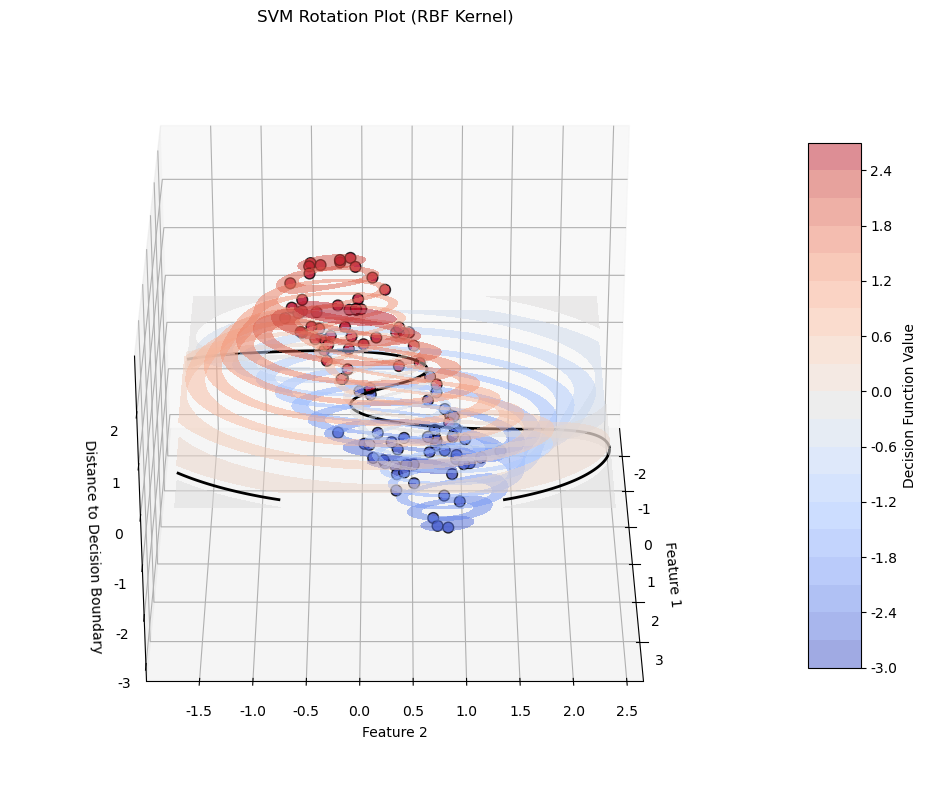

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn import svm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# 确保负号正确显示
plt.rcParams["axes.unicode_minus"] = False

# 生成月牙形数据
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# 训练SVM模型
model = svm.SVC(C=10, kernel='rbf', gamma='scale')
model.fit(X, y)

# 创建网格数据
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 创建3D图
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制决策边界
contour = ax.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm', levels=20)
ax.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# 绘制数据点
distance = model.decision_function(X)
scatter = ax.scatter(X[:, 0], X[:, 1], distance, c=y, cmap='coolwarm', 
                     edgecolors='k', s=60, alpha=0.8)

# 设置英文标签和标题
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Distance to Decision Boundary')
ax.set_title('SVM Rotation Plot (RBF Kernel)')

# 颜色条
cbar = fig.colorbar(contour, ax=ax, shrink=0.7, aspect=10)
cbar.set_label('Decision Function Value')

# 初始化视角
ax.view_init(elev=30, azim=45)

# 定义旋转函数
def update(frame):
    ax.view_init(elev=30, azim=frame)
    return scatter,

# 创建动画
ani = FuncAnimation(fig, update, frames=np.arange(0, 360, 2), 
                    interval=100, blit=True)

# 保存动画（可选）
# ani.save('svm_rotation_plot.gif', writer='pillow', fps=10)

plt.tight_layout()
plt.show()


SVM example：Diagnosis of breast cancer

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA  # 用于降维可视化

# 加载乳腺癌数据集（内置数据集，包含30个特征和569个样本）
data = datasets.load_breast_cancer()
X = data.data  # 特征数据（如肿瘤半径、纹理等）
y = data.target  # 标签（0=恶性，1=良性）
feature_names = data.feature_names

In [3]:
# 划分训练集和测试集（7:3）
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y  # stratify保证分层抽样，维持类别比例
)

# 特征标准化（SVM对特征尺度敏感，需标准化到均值为0、方差为1）
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# 初始化SVM模型（RBF核）
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
# 训练模型
svm_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [5]:
# 预测测试集
y_pred = svm_model.predict(X_test_scaled)

# 评估指标
print(f"准确率（Accuracy）：{accuracy_score(y_test, y_pred):.4f}")
print("\n混淆矩阵：")
print(confusion_matrix(y_test, y_pred))
print("\n分类报告：")
print(classification_report(y_test, y_pred))

准确率（Accuracy）：0.9766

混淆矩阵：
[[ 62   2]
 [  2 105]]

分类报告：
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



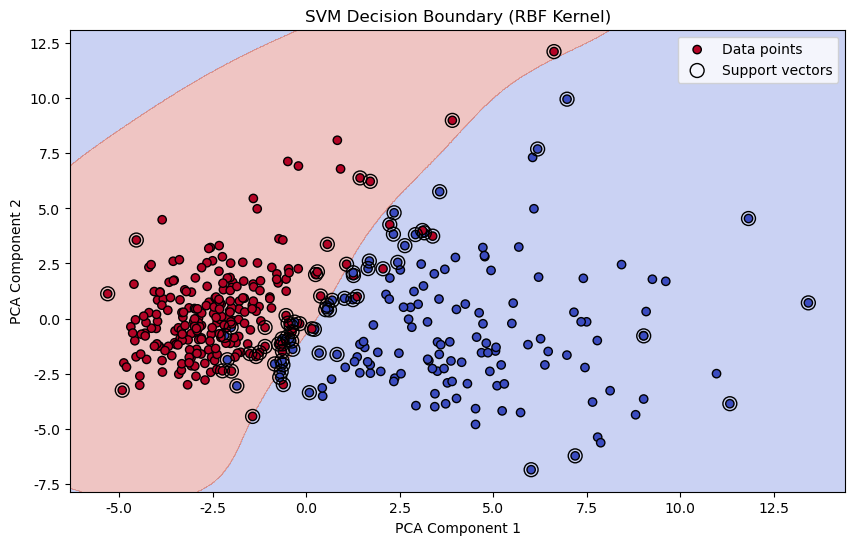

In [6]:
# 使用PCA降维到2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 在降维后的训练集上重新训练SVM（仅用于可视化）
svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_pca.fit(X_train_pca, y_train)

# 绘制决策边界（使用英文标签并适配系统字体）
def plot_decision_boundary(model, X, y):
    h = 0.02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # 预测网格点类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制等高线和散点（不指定中文字体，使用系统默认字体）
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', label='Data points')
    # 标记支持向量（SVM的关键样本）
    plt.scatter(
        X_train_pca[svm_pca.support_, 0], X_train_pca[svm_pca.support_, 1],
        s=100, linewidth=1, facecolors='none', edgecolors='black', label='Support vectors'
    )
    # 使用英文标签，避免中文字体依赖
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('SVM Decision Boundary (RBF Kernel)')
    plt.legend()
    plt.show()

# 可视化训练集的决策边界
plot_decision_boundary(svm_pca, X_train_pca, y_train)